In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
import os
import imageio

In [22]:
plt.rcParams["figure.figsize"] = [7, 7]

R = [0, 1/8, 2/8, 3/8, 1/2, 5/8, 6/8, 7/8, 1]

In [52]:
class Shelling_model:
  def __init__(self, size=100, threshold=0.5, max_iter=50):
    self.size = size
    self.threshold = threshold
    self.max_iter = max_iter
    self.init_map = np.random.randint(low=0, high=2, size=(size, size))
    self.map = copy.deepcopy(self.init_map)
    self.map_history = [copy.deepcopy(self.init_map)]
    self.num_dissap_evol = []

  def plot_init_map(self):
    plt.imshow(self.init_map, cmap='binary')

  def count_neighbours(self, row_num, col_num, val):
    sl0 = np.array(range(row_num-1,row_num+2)).reshape(-1,1)%self.map.shape[0]
    sl1 = np.array(range(col_num-1,col_num+2)).reshape(1,-1)%self.map.shape[1]
    neighbourhood = self.map[sl0, sl1]
    n_neighbours = len(np.where(neighbourhood == val)[0])-1
    return n_neighbours

  def one_iter(self):
    market = {}
    dissapointed = []
    number = 0
    for (row, col), val in np.ndenumerate(self.map):
      n_neighbours = self.count_neighbours(row, col, val)
      if n_neighbours < self.threshold*8:
          market[(row, col)] = number
          dissapointed.append(val)
          number += 1
    if len(dissapointed) != 0:
      random.shuffle(dissapointed)
      for key in market:
        self.map[key[0], key[1]] = dissapointed[market[key]]
      self.map_history.append(copy.deepcopy(self.map))
    self.num_dissap_evol.append(len(dissapointed))

  def play_game(self):
    for _ in range(self.max_iter):
      self.one_iter()

  def plot_final_map(self):
    plt.imshow(self.map_history[-1], cmap='binary')

  def plot_evolution(self):
    for i in range(len(self.map_history)):
      N = int(len(self.map_history)//10)
      if i%10 == 0:
        plt.imshow(self.map_history[i], cmap='binary')
        plt.show()

  def make_gif(self, gif_name='res', duration=1, freq=10):
    images = []
    for i in range(len(self.map_history)):
      N = int(len(self.map_history)//freq)
      if N == 0:
        images = copy.deepcopy(self.map_history)
      else:
        if i%N == 0:
          images.append(self.map_history[i])
    imageio.mimsave(gif_name + '.gif', images, duration=duration)



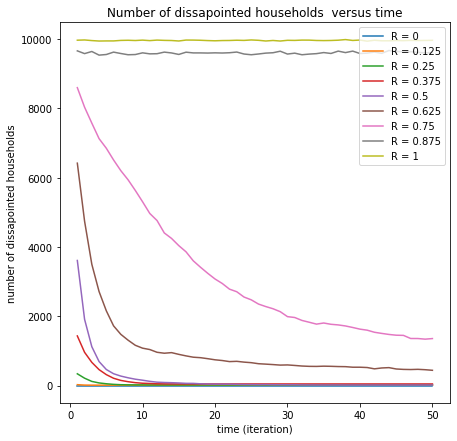

In [53]:
MAX_ITER = 50
X = [i for i in range(1,MAX_ITER+1)]

for r in R:
  shel_model = Shelling_model(threshold=r, max_iter=MAX_ITER)
  shel_model.play_game()
  shel_model.make_gif(gif_name=str(r))

  plt.plot(X, shel_model.num_dissap_evol, label='R = ' + str(r))

plt.xlabel('time (iteration)')
plt.ylabel('number of dissapointed households')
plt.title('Number of dissapointed households  versus time')
plt.legend(loc='upper right')